# 6. Feladatsor

*(Lagrange-interpoláció, Hermite-interpoláció)*

### Interpolációs-polinom
A gyakorlatban nem egyszer előfordul, hogy egy folytonos függvényt nem ismerünk a teljes értelmezési tartományán, csak néhány $x_0, x_1, . . . , x_n$ alappontban felvett $f_0, f_1, . . . , f_n$
értékét tudjuk. Ez a helyzet például akkor, ha az adatok diszkrét pontokban végzett
mérésekből származnak. Láttuk, hogy bizonyos esetekben találhatunk pontosan egy olyan polinomot, ami az adott (alap)pontokban pontosan az elvárt értékeket veszi fel. Ekkor ezt az (egyértelmű) polinomot interpolációs-polinomnak nevezzük, mely elnevezés magában hordozza azt is, hogy a kapott polinomot az alappontok konvex burkán tekintjük. Tegyük fel, hogy az $f : \mathbb{R} → \mathbb{R}$ függvényt csak az $x_0, x_1, . . . , x_n$ pontokban ismerjük.
Jelölje $f_k$ az $f(x_k)$ függvényértéket, $k = 0, 1, . . . , n$. Olyan $p$ polinomot keresünk, amelynek fokszáma legfeljebb $n$, és teljesül, hogy $p(x_k) = f_k$, $k = 0, 1, . . . , n$.

#### 1. Feladat
Adjuk meg azt a lineáris egyenletrendszert adott $x_0,x_1,...x_n$ és $f_0,f_1,...f_n$ értékek mellett, amelynek megoldása pont az egyértelmű interpolációs polinom együtthatóit adja meg.

#### Az interpolációs polinom Lagrange-féle alakja

Az előző feladat megoldásakor, a használt bázis az $x^n$ alakú monomokból áll, a kapott mátrix nagy kondíciószámú lesz, ennél jobb bázist is találhatunk. 

A $j$-edik alappontra felírt $l_j(x)$ alappolinom $(l_j(x_m)=\delta_j(m))$: $$l_j(x)=\prod_{k=0,k\neq j}^n \dfrac{x-x_k}{x_j-x_k}$$

Ez egy olyan polinom, amely minden alapponton $0$, kivéve $x_j$-ben, ahol pedig 1.

$f$ interpolációját ezek lineáris kombinációjaként kapjuk: $$p(x)=\sum_{j=0}^n l_j(x)f_j$$


#### 2. Feladat
Írjuk fel a $-1, 0, 1$ pontokhoz tartozó $l_j$ polinomokat. Írjuk fel az interpolációs polinomot, ha ezekben a pontokban a felvett értékek rendre $1, 0, 1$. Melyik polinomot kaptuk vissza, milyen bázisban?

Ha $f$ legalább $n+1$-szer folytonosan differenciálható, az $n+1$ pontra felírt $n$-edfokú Lagrange interpolációs polinom hibája felírható az alábbi alakban. (előadáson láttuk)
$$f(x)-p_n(x)=\dfrac{1}{(n+1)!}\omega_n(x)f^{(n+1)}(\xi),$$
ahol $\omega_n(x)=(x-x_0)(x-x_1)...(x-x_n)$ alappolinom, $\xi$ pedig az $x_k$-kat és $x$-et tartalmazó legszűkebb intervallumban van. Ebből láthatjuk, hogy a Lagrange-interpoláció pontos lesz, ha legfeljebb $n$-edfokú polinomokat közelítünk, illetve általában következtethetünk arra, hogy milyen jól is közelítjük a függvényt.

#### 3. Feladat
Legyen $f$ egy $n+1$-edfokú polinom, amelyet interpolálni szeretnénk Lagrange-interpolációval az $x_0,x_1...x_n$ alappontokon. Mit mondhatunk el az interpoláció hibájáról?

In [296]:
# a hiba pontosan \omega_n

#### Az interpolációs-polinom Newton-féle alakja

Az előbbi tulajdonság adhat nekünk arra, hogy az alábbi alakban keressük az interpolációs polinomot. 

Hogyan tudunk olyan bázist készíteni, melyet könnyen "frissíthetünk" akkor, ha új pontpárunk érkezik?

Lássunk erre egy algoritmust.

Egyetlen $(x_0, y_0)$ pontpár esetén az interpolációs polinom konstans $y_0$.

Ha $p_n$ adott $n$-edfokú polinom, mely az $(x_0, \ldots, x_n)$ alappontokban rendre $(y_0, \ldots, y_n)$ értékeket vesz fel, akkor adjunk hozzá egy olyan eggyel magasabb fokú tagot, mely ezekben a pontokban $0$-t vesz fel, úgy, hogy az így keletkező polinom legyen az $x_{n+1}$ pontban $y_{n+1}$. Újra visszatérve tehát a gyöktényezős alak ötletéhez, legyen
   $$ p_{n+1}(x) = p_n(x) + c_{n+1}\cdot(x - x_0)(x-x_1)\cdots(x-x_n)=p_n(x) + c_{n+1}\cdot \omega_{n}(x),$$
   
ahol bevezettük az $\omega_{n}(x)=(x - x_0)(x-x_1)\cdots(x-x_n)$ alappolinomokat.

Ekkor $ p_{n+1}(x_j) = p_n(x_j) = y_j$ az utolsó kivételével minden $x_j$ pontban, ahol pedig
$$ p_{n+1}(x_{n+1}) = p_n(x_{n+1}) + c_{n+1} \cdot \omega_n(x_{n+1}).$$
Tehát amennyiben a
$$ c_{n+1} = \frac{y_{n+1} - p_n(x_{n+1})}{\omega_n(x_{n+1})}$$
választással élünk, akkor meg is vagyunk, így a $p_n$ interpolációs polinomot ez esetben az $\omega_j$ báziselemek lineáris kombinációjaként fejezzük ki, mely bázis bővítése egyszerű.

A Newton-féle,
$$ p_{n+1}(x) = p_n(x) + c_{n+1}\cdot\omega_n(x)$$

alakban előkerülő $c_n$ együtthatót szokás az $n$. osztott differenciának is nevezni. Ennek értéke függ mind az $x_j$ pontoktól, mind pedig az $y_j=f(x_j)$ értékektől. Jelöljük az $i_1, \ldots i_k$ indexű pontpárokra épülő osztott differenciát $\delta_{i_1, \ldots, i_k}$-val; ha az indexek egymást követik, akkor használjuk a $\delta_{n:n+k}$ jelölést, ezzel $c_{n+1} = \delta_{0:n}$.
Rekurzió:
$$\delta_{0:k+1} = \frac{\delta_{1:k+1} - \delta_{0:k}}{x_{k+1} - x_0}.$$

Vizuális segítség:

A táblázat felső (átlós) sora fogja megadni a $c_n$ együtthatókat $f(x_0)$-tól kezdődően.

#### 4. Feladat
Írjuk fel a $-1, 0, 1$ pontokhoz tartozó $\omega_j$ polinomokat. Írjuk fel az interpolációs polinomot az osztott differenciák módszerével, ha ezekben a pontokban a felvett értékek rendre $1, 0, 1$. Melyik polinomot kaptuk vissza, milyen bázisban?


#### *5. Feladat
Mutassuk meg, hogy $$l_j(x) = \frac{\omega_{n}(x)}{x-x_j} \cdot \frac{1}{\omega_{n}'(x_j)}.$$

----------
#### Hermite-interpoláció

Tegyük fel, hogy $x_0, \ldots, x_{n}$ alappontokonban rendelkezésünkre állnak $y_0, \ldots, y_{n+1}$ függvényértékek és $y_0', \ldots, y_{n+1}'$ deriváltértékek.

Konstruáljunk olyan (legfeljebb) $(2(n+1) - 1)$-edfokú polinomot, mely, illetve melynek deriváltja az alappontokban a megfelelő értékeket veszi fel!

**Ötlet:** csináljuk meg először egy ponttal.
<details>
<summary></summary>
$$x \mapsto y_0 + y_0'(x- x_0)$$
</details>

#### 6. Feladat

Legyen $f$ kellően sima függvény. Melyik a legjobb nulladfokú polinom közelítése a függvénynek egy pontban, mely benne van az értelmezési tartományában? A legjobb elsőfokú? A legjobb $k$-adfokú?

#### 7. Feladat

Az 1. feladathoz hasonlóan adjuk meg azt a lineáris egyenletrendszert adott $x_0,x_1,...x_n$,  $y_0,y_1,...y_n$ és $y_0', \ldots, y_{n}'$ értékek mellett, amelynek megoldása pont az egyértelmű interpolációs polinom együtthatóit adja meg.




Ha $x_0, \ldots, x_{n-1}$-re már van egy megfelelő, $p_{2n-1}$ polinomunk, akkor keressük az új, $p_{2n+1}$ polinomot a következő alakban:

$$p_{2n+1} = p_{2n-1} + q_{2n+1},$$

ahol $q_{2n+1}$ egy olyan polinom, melynek 0. és 1. deriváltjai az első $n$ pontban mind nullák, és foka kettővel nagyobb.

Hogyan tudnánk ilyen $q_{2n+1}$ polinomot konstruálni a $w_{n-1}(x) = (x- x_0)(x-x_1) \cdots (x - x_{n-1})$ polinomból?


   Legyen
    $$ q_{2n+1}(x) = w_{n-1}^2(x)( b_{2n+1} + a_{2n+1}(x-x_{n})).$$


**Ötlet:** Az ismeretlen együtthatók meghatározhatók a két új adat behelyettesítésével.

Először:
$$ y_{n} = p_{2n-1}(x_{n}) + q_{2n+1}(x_{n}) $$

Innen: $$ b_{2n+1} = \frac{y_n - p_{2n-1}(x_n)}{w_{n-1}^2(x_n)} $$

Másodszor:
$$ y_{n}' = p_{2n-1}'(x_{n}) + q_{2n+1}'(x_{n}) $$

Deriválással látható, hogy 
$$ q_{2n+1}'(x) = 2w_{n}'(x)w_{n-1}(x)( b_{2n+1} + a_{2n+1}(x-x_{n})) + w_{n-1}^2(x)a_{2n+1},$$
azaz
$$ p_{2n+1}'(x_n) = p_{2n}'(x_n) + 2w_{n-1}'(x_n)w_{n-1}(x_n)b_{2n+1} + w_{n-1}^2(x_n)a_{2n+1},$$
ahonnan
$$
a_{2n+1} = \frac{y_n' - p_{2n}'(x_n) - 2w_{n-1}'(x_n)w_{n-1}(x_n)b_{2n+1} }{w_{n-1}^2(x_n)}.
$$


#### 8. Feladat
Írjuk fel Hermite-interpoláció ötletével azt a polinomot, amire az $x_0 = -1$ pontban $y_0 = 1$, $y_0' = -2$ és amire a $x_1 = 0$ pontban $y_1 = 0$. Hogyan változik a polinom, ha azt is tudjuk, hogy $y_1' = 0$?

In [72]:
# x_0-beli adatok alapjan: 1 - 2*(x + 1)
# x_1-beli Hermite-alak:   1 - 2*(x+1) + (x+1)^2*(b + ax)
#                        
#          y_1 alapjan:    0 = y_1 = 1 - 2*(0 + 1) + 1*b = 1 - 2 + b
#                          b = y_1 + 1
#                          tehat 1 - 2*(x+1) + (x+1)^2 jo
#          y_1' alapjan:
#                          0 = y_1' = -2 + 2*1*(1 + a*0) + 1^2*a
#                          a = y_1' = 0
#                          tehat 1 - 2*(x+1) + (x+1)^2*(1 + 0*x) jo

Természetesen magasabb rendű deriváltak is adottak lehetnek az alappontokon. Az Hermite-interpolációs polinomot is felírhatjuk Newton-alakban. Ez utóbbit úgy készítjük el, hogy mindegyik $x_k$ alappontot $m_k + 1$-szer veszünk fel az első
oszlopban $(m_k \text{ deriváltat ismerünk } x_k\text{-ban})$, melléjük $f(z_k)$-t
-t írjuk, továbbá az $i$-ed rendű osztott differenciák oszlopában
azonos alappontok esetén (azaz ha nullával osztanánk) az $\dfrac{f^{(i)}(x_k)}{i!}$
értéket írjuk be.

Pl.: $f(x)=x^8+1$ függvényt közelítenénk a $-1,0,1$ pontokon, és ismerjük az függvény értékeket és az első illetve második deriváltakat itt.

Az alappolinomokat is ehhez megfelelően tekintjük. A példában $$\omega_j(x)=\prod_{k=0}^j(x-z_k) \qquad j\in\{0,1,2,...8\}$$
Így az interpolációs polinom felírható $$2\cdot \omega_0(x)-8\cdot\omega_1(x)+...- \omega_7(x)+\omega_8(x)$$ alakban.

#### 9. Feladat

Írjuk fel a Hermite-interpolációs polinomját Newton alakban az $f(x)=3^x$ függvénynek, ha a $0$ és $2$ pontokban van előírva a függvény és az első derivált értéke.

#### P 1.Feladat

Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- vektorokra interpolációs polinomot illeszt az 1. feladatbeli módszerrel számoljuk ki a rendszert leíró mátrix kondíciószámát, ha $x=[2,3,6,10,14]$ és $y=[1,-2,4,9,13]$

In [1]:
import numpy as np

def poly_fit(xs: np.array, ys: np.array, n=None):
    # xs: alappontok, m hosszú vektor
    # ys: alappontokba óhajtott értékek, m hosszú vektor
    # n: fokszám, nemnegatív egész (n=m esetén interpoláció, n<m esetén regresszió)
    if n is None:
        n=np.size(xs)
            
    nn=np.arange(n)
    xs=xs[:,None]
    nn=nn[None,:]
    A = xs**nn 
    b = ys
    coeff=np.linalg.solve(A.T@A,A.T@b) # ha n<m, akkor normálegyenlet, négyzetes esetén A^*Ax=A^*b megoldása ugyanaz mint, Ax=b megoldása 
    coeff=coeff[::-1]
    return A, coeff

In [2]:
A,coeff= poly_fit( np.array([2,3,6,10,14]),np.array([1,-2,4,9,13]))
np.linalg.cond(A)


512889.03129218135

In [3]:
def poly_f(c,x): #mint az np.polyval
    #c: együtthatók
    #x: változó
    n=np.size(c)
    nn=np.arange(n-1,-1,-1)
    xx=x**nn
    return np.sum(c*xx)

In [4]:
poly_f([1,0,0,0],2)

8

In [5]:
poly_f(coeff,14)

13.0

#### P 2. Feladat

Írjunk programot, ami adott $x$ és $y$ -pontokat és az ott felveendő értékeket tartalmazó- vektorokra interpolációs polinomot illeszt a Newton-alak használatával, majd egy további $z$ pontban kiértékeli azt.

In [17]:

def poly_fit_newton(xs, ys):
    def p(k):
        if k == 0:
            return lambda z: ys[0]
        else:
            c = (ys[k] - p(k-1)(xs[k])) / np.prod(xs[k] - xs[0:k])
            return lambda z: p(k-1)(z) + c * np.prod(z - xs[0:k])

    n = min(len(xs), len(ys)) - 1
    return p(n)

# Példa használat
xs = np.array([1, 2, 3])
ys = np.array([1, 4, 9])

interpolation_poly = poly_fit_newton(xs, ys)

# Kiértékeljük az interpolációs polinomot egy adott pontban
x = 2.5
print("Az interpolációs polinom értéke x =", x, "pontban:", interpolation_poly(x))


Az interpolációs polinom értéke x = 2.5 pontban: 6.25


#### P 3. Feladat
Tekintsük az $$f(x) = \frac{1}{1 + 25x^2}$$ függvényt a $[-1, 1]$ intervallumon. Írjunk programot, ami adott $n$ esetén  az intervallum egy $n+1$ elemű, egyenletes rácsán felvett értékek alapján $n$-edfokú polinomot illeszt erre a függvényre. 

Ábrázoljuk a kapott polinomokat $n=2,4,8,12$ esetén. Mit tapasztalunk?

In [79]:
def f_fv(x):
    return 1 / (1 + 25*x**2)


Text(0, 0.5, 'y')

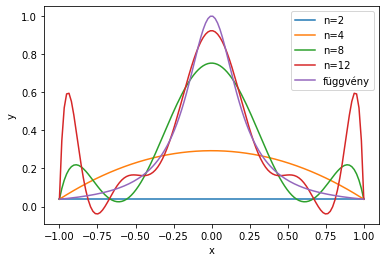

In [80]:
import matplotlib.pyplot as plt

xx = np.linspace(-1,1,128)
ax = plt.axes()
for n in [2,4,8,12]:
    xs=np.linspace(-1,1,n)
    poly=poly_fit_newton(xs,f_fv(xs))
    poly_v=np.vectorize(poly)
    ax.plot(xx, poly_v(xx), label="n=" + str(n))


ax.plot(xx, f_fv(xx), label="függvény")    

ax.legend()
ax.set_xlabel(r"x")
ax.set_ylabel(r"y")

Megjegyzés: A **Weierstrass-tétel** szerint minden $[-1, 1] \to \mathbb{R}$ folytonos függvény egyenletesen, tetszőleges pontossággal megközelíthető polinomokkal.

Gondolhatnánk, hogy ennek bizonyítása lehetne az, hogy adott $n>0$ egész esetén veszünk egy $n+1$ pontból álló, egyenletes rácsot a $[-1, 1]$ intervallumon, majd ezekre $n$-edfokú polinomot illesztünk és készen vagyunk, de sajnos ez nincs így.

Nézzük meg, hogy tudjuk-e reprodukálni a problémát akkor, ha a fenti képletben elhagyjuk a $25$-öt.

Text(0, 0.5, 'y')

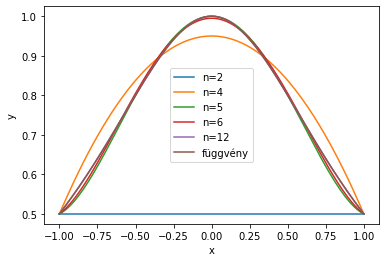

In [81]:
def f_fv2(x):
    return 1 / (1 + x**2)

ax = plt.axes()

for n in [2,4,5,6,12]:
    xs=np.linspace(-1,1,n)
    poly=poly_fit_newton(xs,f_fv2(xs))
    poly_v=np.vectorize(poly)
    ax.plot(xx, poly_v(xx), label="n=" + str(n))


ax.plot(xx, f_fv2(xx), label="függvény")    

ax.legend()
ax.set_xlabel(r"x")
ax.set_ylabel(r"y")

#### P 4. Feladat
Írjunk programot, mely egy polinomot a Horner-séma szerint értékel ki.

**Emlék:**
$$ c_0 + c_1 x + c_2 x^2 + \ldots \qquad \text{helyett} \qquad c_0 + x \left( c_1 + x \left( c_2 + \ldots \right) \right)$$

Hogyan alakul a műveletigénye a két megközelítésnek?

In [82]:
def horner_sema(coeff, x):
    # coeff: a polinom együtthatói
    # x: a pont ahol ki szeretnénk értékelni a polinomot
    
    accumulator = 0
    for c in coeff[:0:-1]:
        accumulator += c
        accumulator *= x
    
    
    return accumulator + coeff[0]

In [83]:
horner_sema([0,1,1,2], 3)

66

#### P 5. Feladat

Írjunk programot, ami adott $x$ és $y, y'$ -pontokat és az ott felveendő értékeket, illetve deriváltakat tartalmazó- vektorokra Hermite-féle interpolációs polinomot illeszt, majd egy további $z$ pontban kiértékeli azt.

In [1]:
import numpy as np

def poly_fit_hermite(xs, ys, ys_):
    def w(k):
        if k == 1:
            return lambda z: 1
        return lambda z: np.prod(z - xs[0:k-1])
        
    def dw(k):
        if k == 1:
            return lambda z: 0
        A = lambda z: z * np.ones((len(xs[0:k-1]), 1)).T - xs[0:k-1]
        return lambda z: np.sum(np.prod(A(z) - np.diag(np.diag(A(z))) + np.eye(len(xs[0:k-1])), axis=1))

    def p(k):
        if k == 0:
            return lambda z: 0
        return lambda z: p(k-1)(z) + (w(k)(z))**2 * (a(k)*(z - xs[k-1]) + b(k))
        
    def dp(k):
        if k == 0:
            return lambda z: 0
        return lambda z: dp(k-1)(z) + 2*dw(k)(z)*w(k)(z)*(a(k)*(z - xs[k-1]) + b(k)) + w(k)(z)**2 * a(k)

    def b(k):
        if k == 1:
            return ys[0]
        return (ys[k-1] - p(k-1)(xs[k-1])) / (w(k)(xs[k-1]))**2

    def a(k):
        if k == 1:
            return ys_[0]
        return (ys_[k-1] - dp(k-1)(xs[k-1]) - 2*dw(k)(xs[k-1])*(w(k)(xs[k-1]))*b(k)) / (w(k)(xs[k-1]))**2
    
    n = min(min(len(xs), len(ys)), len(ys_))
    return p(n)

# Példa használat
xs = np.array([0,1,2])
ys = np.array([0,1,8])
ys_ = np.array([0,3,12])

interpolation_poly = poly_fit_hermite(xs, ys, ys_)

# Kiértékeljük az interpolációs polinomot egy adott pontban
x = 3
print("Az interpolációs polinom értéke x =", x, "pontban:", interpolation_poly(x))


Az interpolációs polinom értéke x = 3 pontban: 27.0
